#### initialize some parameters

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tck


# without smearing:
# smearing_str = 'no Smearing'
# momemta_weight_filepath = "weights10.csv"
# madminer_model_files = '/home/zbhatti/codebase/madminer/momemta/inputs/alice_wo_smearing/alice'
# madminer_x_test_filepath = '/home/zbhatti/codebase/madminer/momemta/inputs/x_test_wo_smearing.npy'


# with smearing:
smearing_str = 'with Smearing'
momemta_weight_filepath = "weights11.csv"
madminer_model_files = '/home/zbhatti/codebase/madminer/momemta/inputs/alice_w_smearing/alice'
madminer_x_test_filepath = '/home/zbhatti/codebase/madminer/momemta/inputs/x_test_w_smearing.npy'


#### Load momemta results

In [2]:


momemta_out = np.genfromtxt(momemta_weight_filepath, delimiter=",")

benchmarks = momemta_out[0,:-1]
n_benchmarks = benchmarks.shape[0]
momemta_weights = momemta_out[1:,:-1]
n_events = momemta_weights.shape[0]
expected_benchmark_idx = 12
top_width = 1.5
print 'expected benchmark: {}'.format(benchmarks[expected_benchmark_idx])
print benchmarks, benchmarks.shape

expected benchmark: 172.0
[160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185.] (26,)


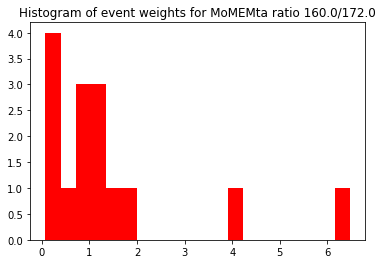

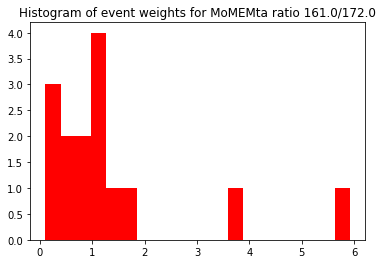

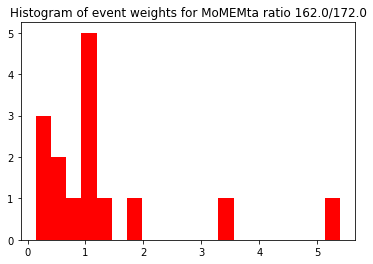

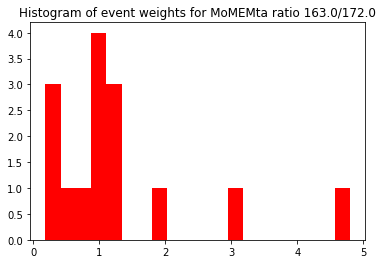

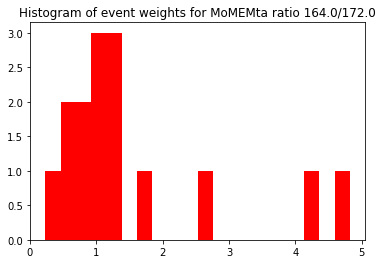

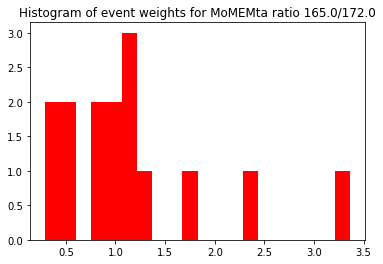

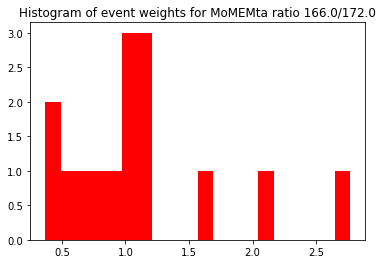

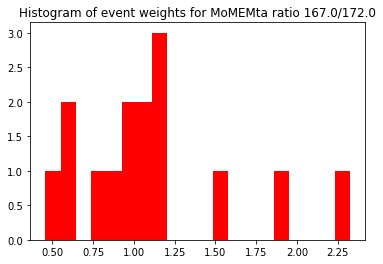

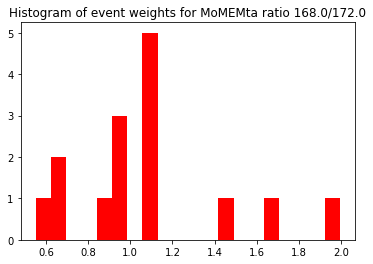

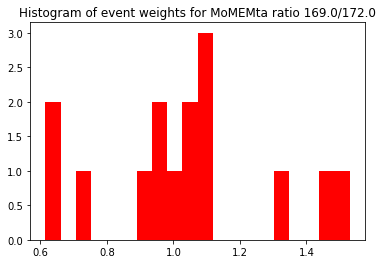

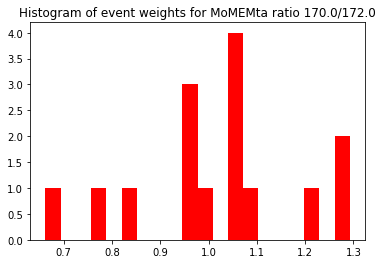

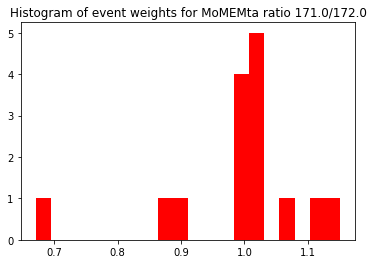

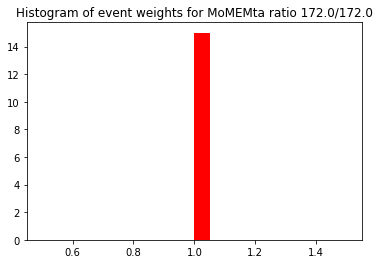

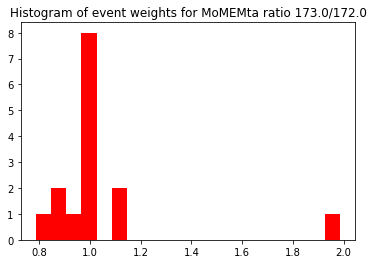

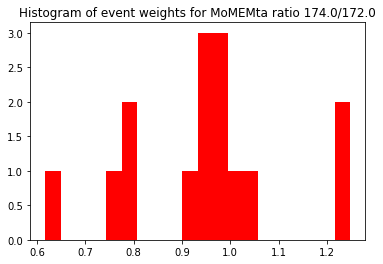

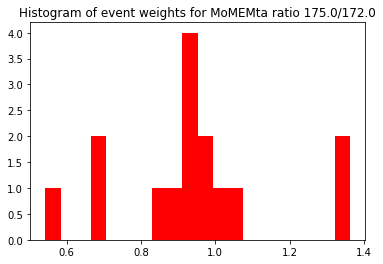

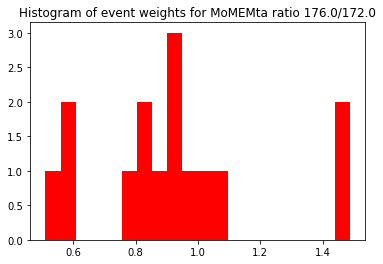

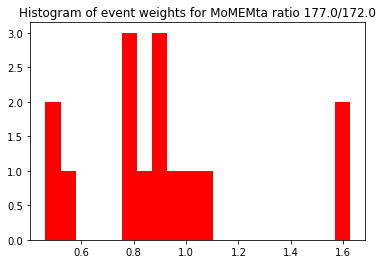

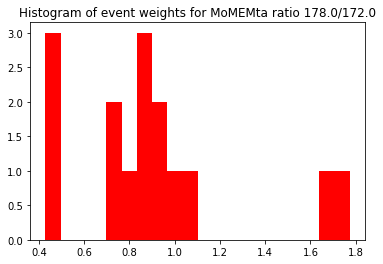

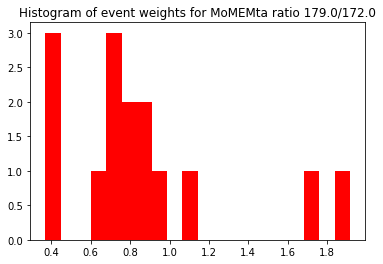

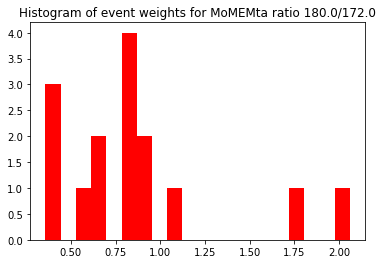

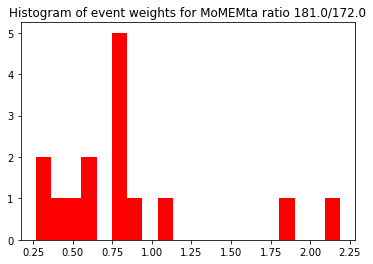

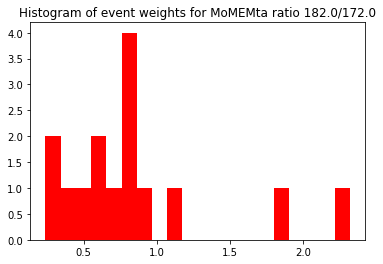

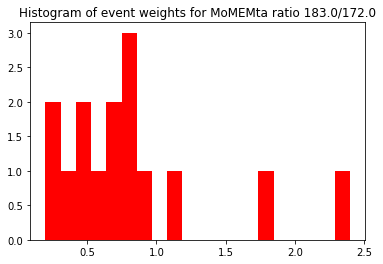

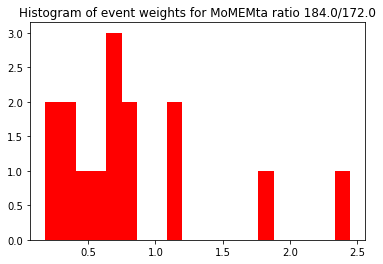

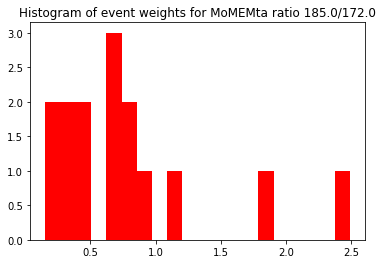

In [3]:
momemta_ratios = []
for event_weights in momemta_weights:
    momemta_ratios.append(event_weights/event_weights[expected_benchmark_idx])
momemta_ratios = np.array(momemta_ratios)

for idx, benchmark in enumerate(benchmarks):
    plt.hist(momemta_ratios[:,idx],bins=20, color='red')
    plt.title('Histogram of event weights for MoMEMta ratio {}/{}'.format(benchmarks[idx], benchmarks[expected_benchmark_idx]))
    plt.show()

In [4]:
momemta_log_sq_ratios = []
momemta_log_ratios = []
for ratio in momemta_ratios:
    momemta_log_ratios.append(np.log(ratio))
    momemta_log_sq_ratios.append(-2 * np.log(ratio))
    
momemta_log_ratios = np.array(momemta_log_ratios)
momemta_log_sq_ratios = np.array(momemta_log_sq_ratios)

print momemta_log_sq_ratios[0][0], momemta_log_sq_ratios[0][expected_benchmark_idx], momemta_log_sq_ratios[0][-1]

1.9965261436687607 -0.0 -1.823303805975007


In [5]:
momemta_sum_log_sq_ratios = np.sum(momemta_log_sq_ratios, axis=0)
print momemta_sum_log_sq_ratios

[ 8.77790168  6.07106933  4.0739638   2.93843973 -3.75921803  0.61062528
  0.52709457 -0.39136368 -0.53315748 -0.12416894  0.07270335  0.44294641
  0.         -0.54275649  2.12169048  2.55175171  3.8701716   4.79396061
  5.45236689  7.10560062  7.637076    9.41459358 10.73542187 12.00985535
 12.46243694 14.31762592]


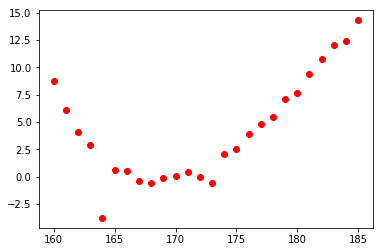

In [6]:
plt.plot(benchmarks, momemta_sum_log_sq_ratios, 'o', color='red');

#### Load madminer model and extract event-level ratios

In [7]:
from madminer.ml import ParameterizedRatioEstimator

In [8]:
forge = ParameterizedRatioEstimator(n_hidden=(100, 100))
forge.load(madminer_model_files)
theta0 = np.vstack( (np.linspace(benchmarks[0], benchmarks[-1], n_benchmarks), top_width*np.ones(n_benchmarks)) ).T
x = np.load(madminer_x_test_filepath)[:n_events,:]
log_ratios_T, _0 = forge.evaluate_log_likelihood_ratio(x=x, theta=theta0, test_all_combinations=True, run_on_gpu=False)
n_observables = x.shape[1]
print theta0.shape, x.shape, log_ratios_T.shape

(26, 2) (15, 23) (26, 15)


[6.0124388e+00 5.1598301e+00 4.3481674e+00 3.5823574e+00 2.8696685e+00
 2.2168829e+00 1.6297485e+00 1.1146750e+00 6.8115598e-01 3.4216738e-01
 1.1194189e-01 2.8190613e-03 2.3148015e-02 1.7660908e-01 4.6166611e-01
 8.7169671e-01 1.3958139e+00 2.0206194e+00 2.7315989e+00 3.5140004e+00
 4.3531308e+00 5.2343845e+00 6.1434526e+00 7.0665202e+00 7.9907227e+00
 8.9044228e+00]


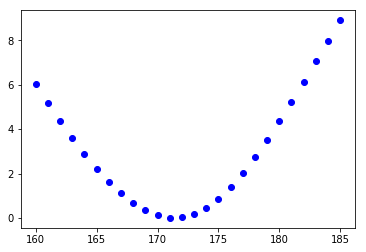

In [9]:
madminer_log_ratios = log_ratios_T.T
madminer_log_sq_ratios = -2*madminer_log_ratios
madminer_sum_log_sq_ratios = np.sum(-2*madminer_log_ratios, axis=0)
print madminer_sum_log_sq_ratios
plt.plot(benchmarks, madminer_sum_log_sq_ratios, 'o', color='blue')


# Comparing madminer with MoMEMta

### compare all events with all bechmarks

/home/zbhatti/.conda/envs/mm_vs_mem/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


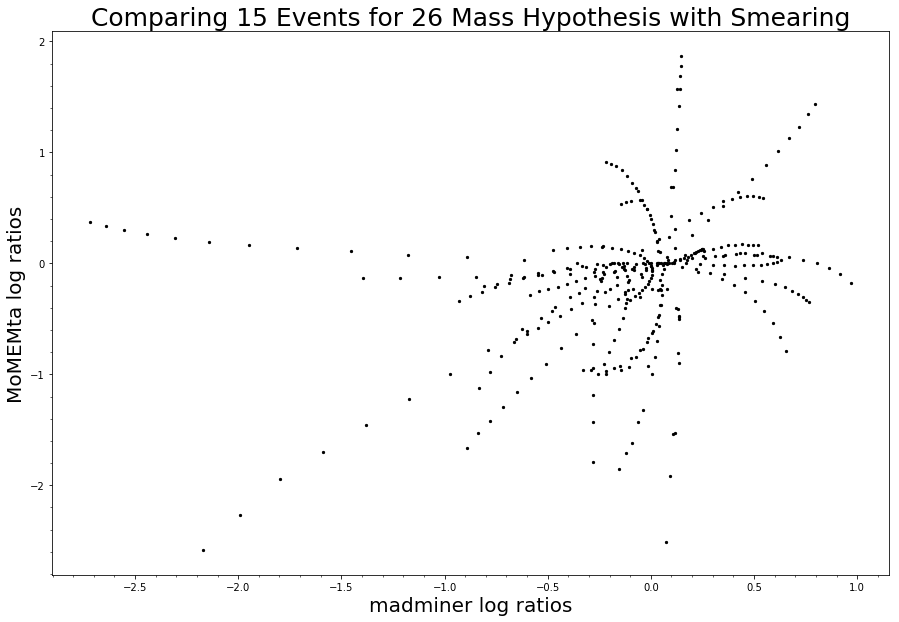

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(madminer_log_ratios, momemta_log_ratios, marker='o', color='black', s=5)
plt.xlabel('madminer log ratios', fontsize=20)
plt.ylabel('MoMEMta log ratios', fontsize=20)
plt.title('Comparing {} Events for {} Mass Hypothesis {}'.format(n_events, n_benchmarks, smearing_str), fontsize=25)
plt.axes().yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.axes().xaxis.set_minor_locator(tck.AutoMinorLocator())
plt.show()

### compare each event for all benchmarks

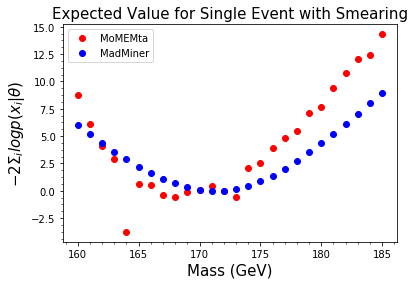

In [11]:
plt.plot(benchmarks, momemta_sum_log_sq_ratios, 'o', color='red', label='MoMEMta')
plt.plot(benchmarks, madminer_sum_log_sq_ratios, 'o', color='blue', label='MadMiner')
plt.legend()
plt.xlabel('Mass (GeV)', fontsize=15)
# plt.ylabel(r'Sum of Log Squared Likelihood Ratios')
plt.ylabel(r'$-2\Sigma_i logp(x_i|\theta)$', fontsize=15)
plt.title('Expected Value for Single Event {}'.format(smearing_str), fontsize=15)
plt.axes().yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.axes().xaxis.set_minor_locator(tck.AutoMinorLocator())
plt.show()

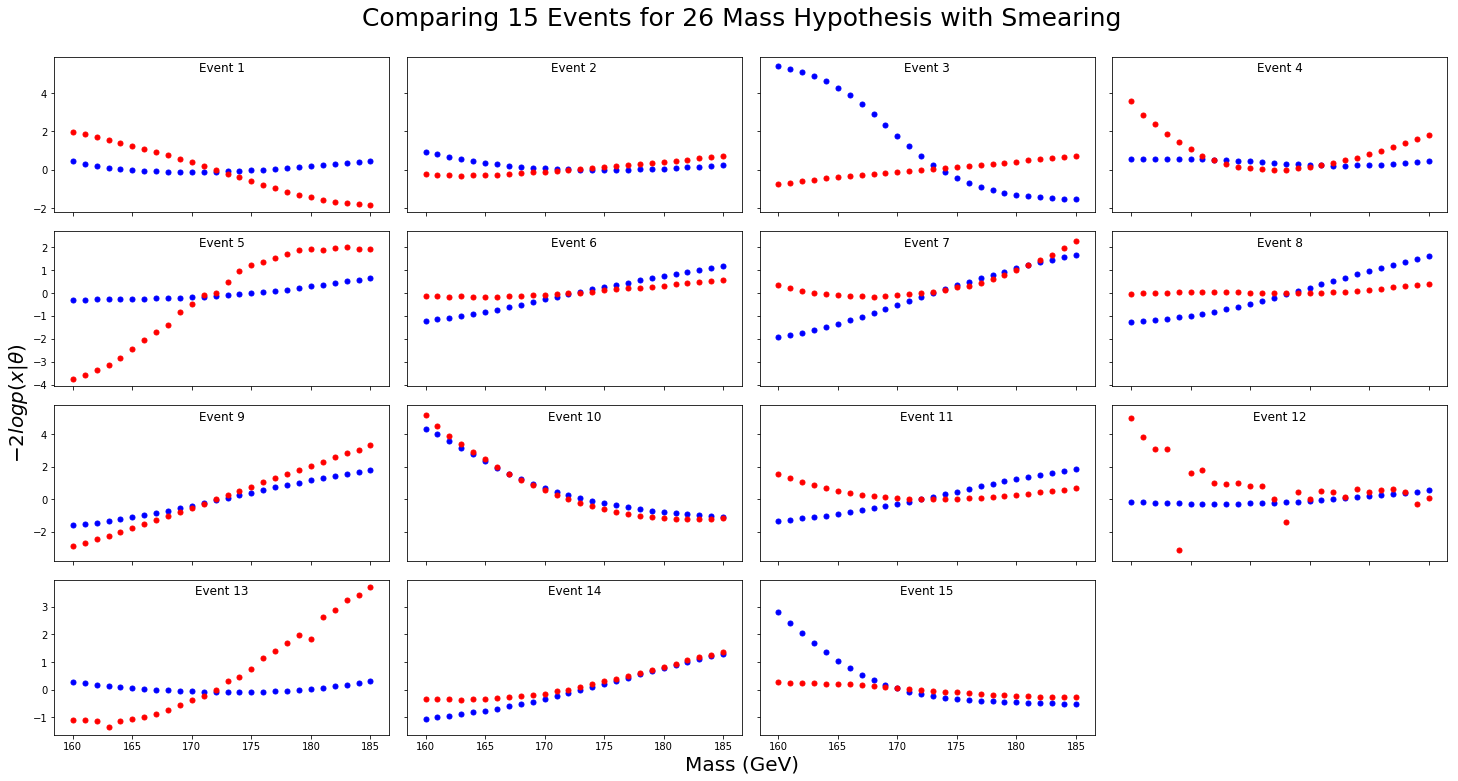

In [12]:
m, n = 4, 4
fig, ax = plt.subplots(m, n, sharex='col', sharey='row')
fig.set_size_inches(20,10)
for i in range(0, n_events):
    x, y = i // m, i % n 
    ax[x][y].scatter(benchmarks, madminer_log_sq_ratios[i], marker='o', color='blue', s=25)
    ax[x][y].scatter(benchmarks, momemta_log_sq_ratios[i] - momemta_log_sq_ratios[i, expected_benchmark_idx], marker='o', color='red', s=25)
    ax[x][y].set_title('Event {}'.format(i + 1),pad=-15)

fig.delaxes(ax[-1][-1])
fig.text(0.5, -0.01, 'Mass (GeV)', ha='center', fontsize=20)
fig.text(-0.01, 0.5, r'$-2logp(x|\theta)$', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.05, 'Comparing {} Events for {} Mass Hypothesis {}'.format(n_events, n_benchmarks, smearing_str), ha='center', va='top', fontsize=25)
plt.tight_layout()
plt.show()

### compare all events for each bechmark

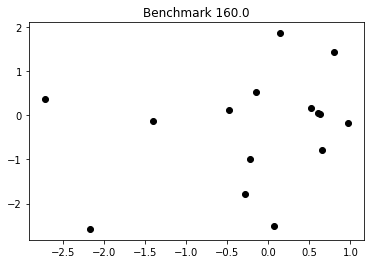

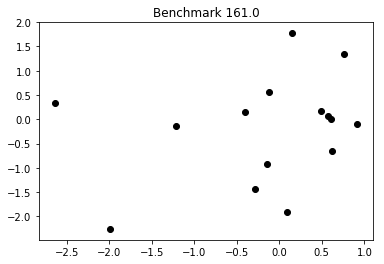

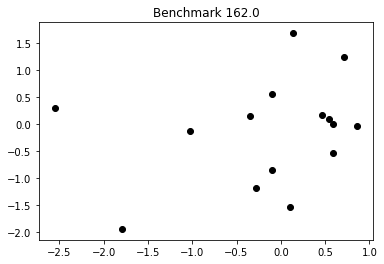

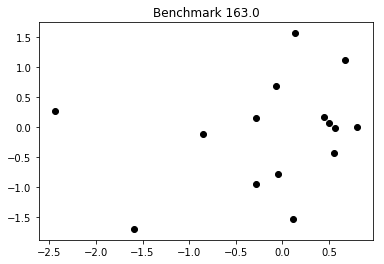

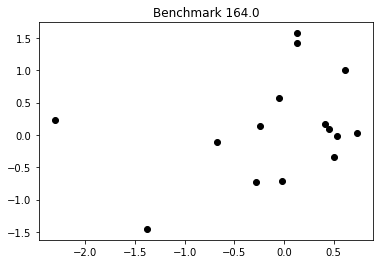

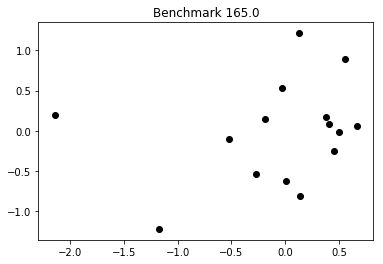

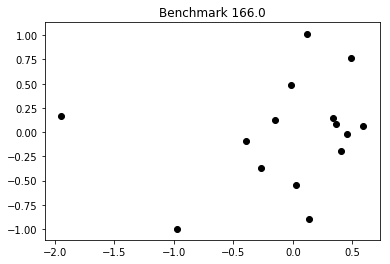

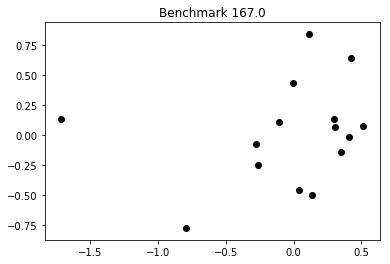

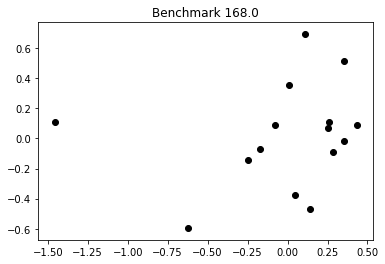

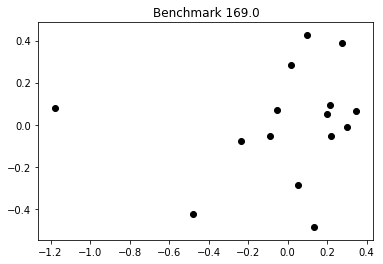

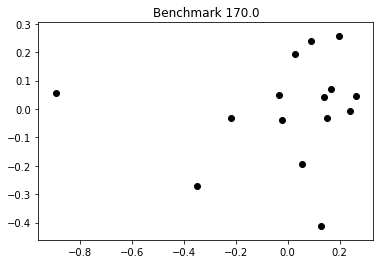

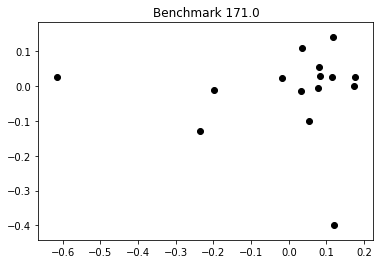

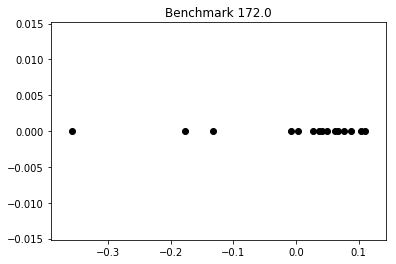

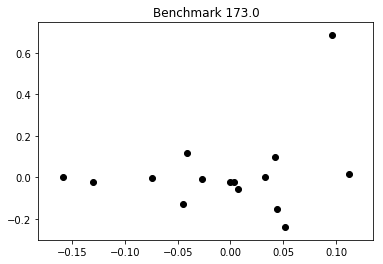

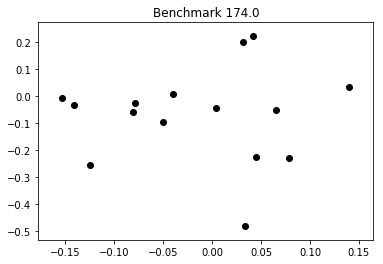

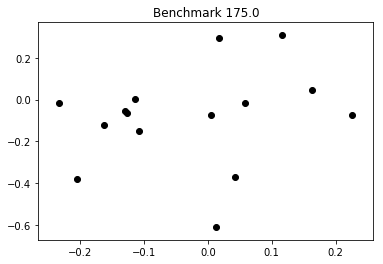

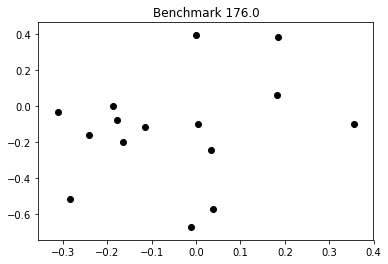

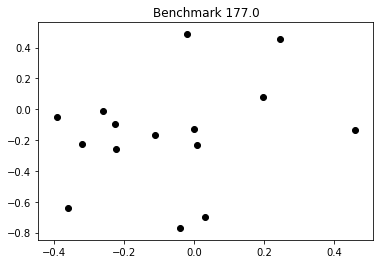

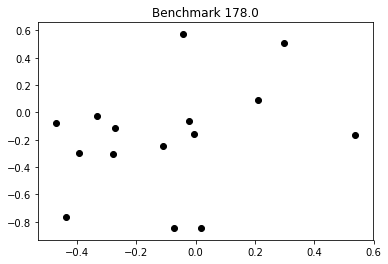

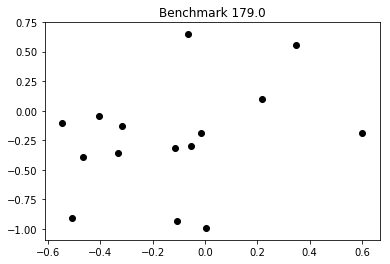

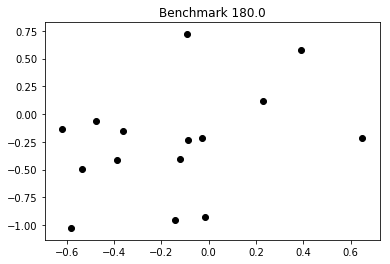

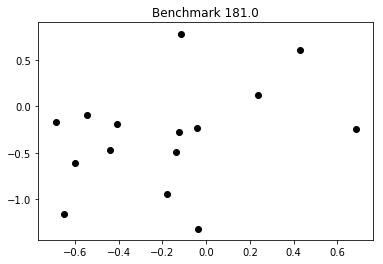

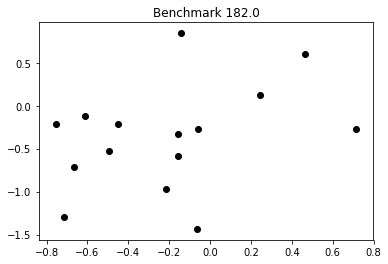

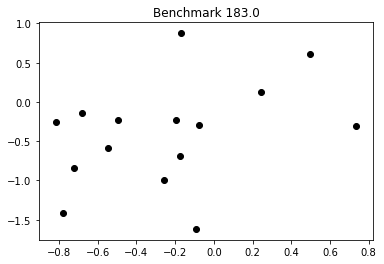

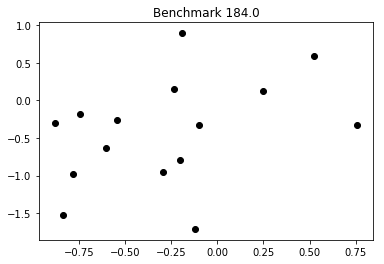

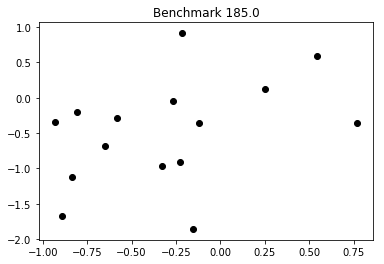

In [13]:
for i in range(0,madminer_log_ratios.shape[1]):
    plt.scatter(madminer_log_ratios[:,i], momemta_log_ratios[:,i] - momemta_log_ratios[:,expected_benchmark_idx], marker='o', color='black');
    plt.title('Benchmark {}'.format(benchmarks[i]))
    plt.show()

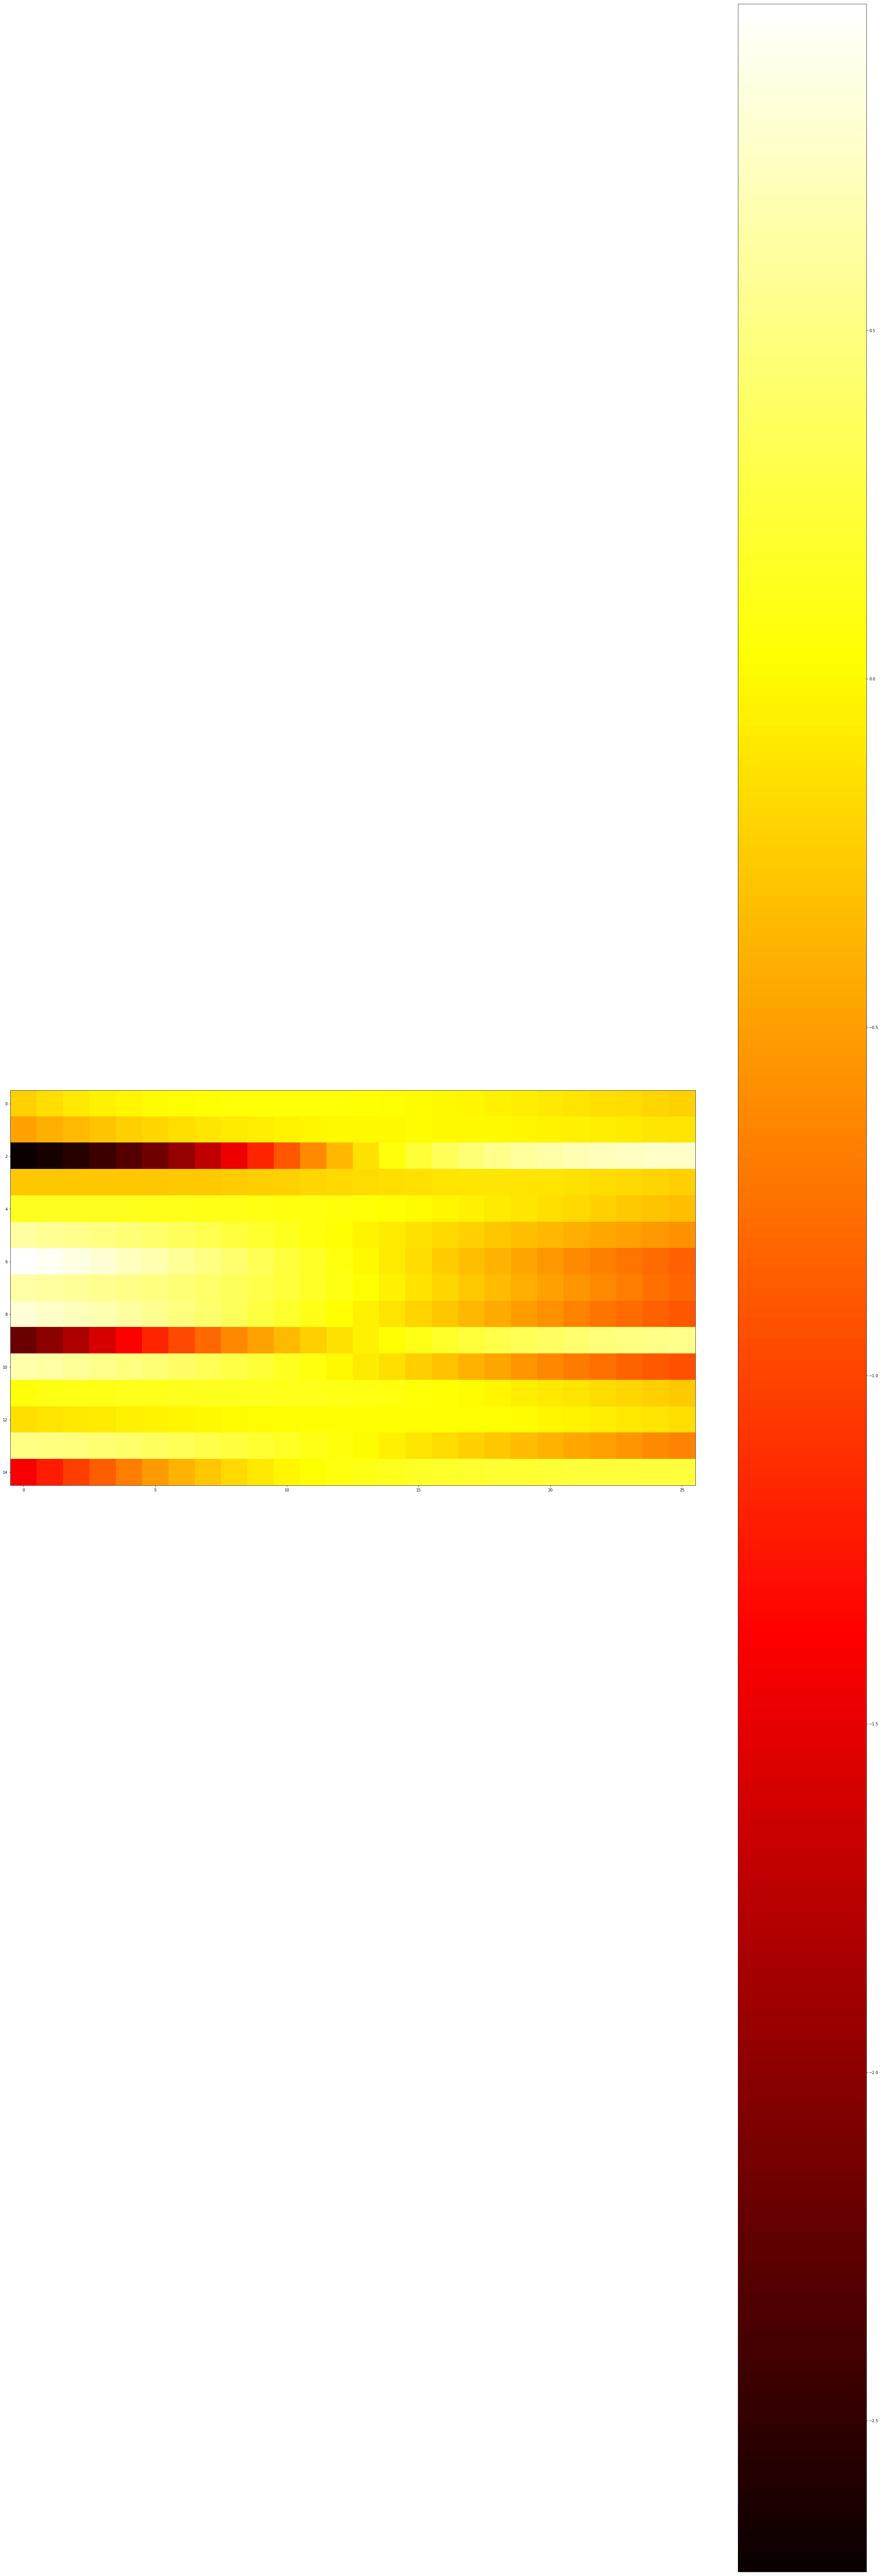

In [14]:
plt.figure(figsize=(40, 170))
plt.imshow(madminer_log_ratios, cmap='hot', interpolation='nearest')
plt.colorbar()


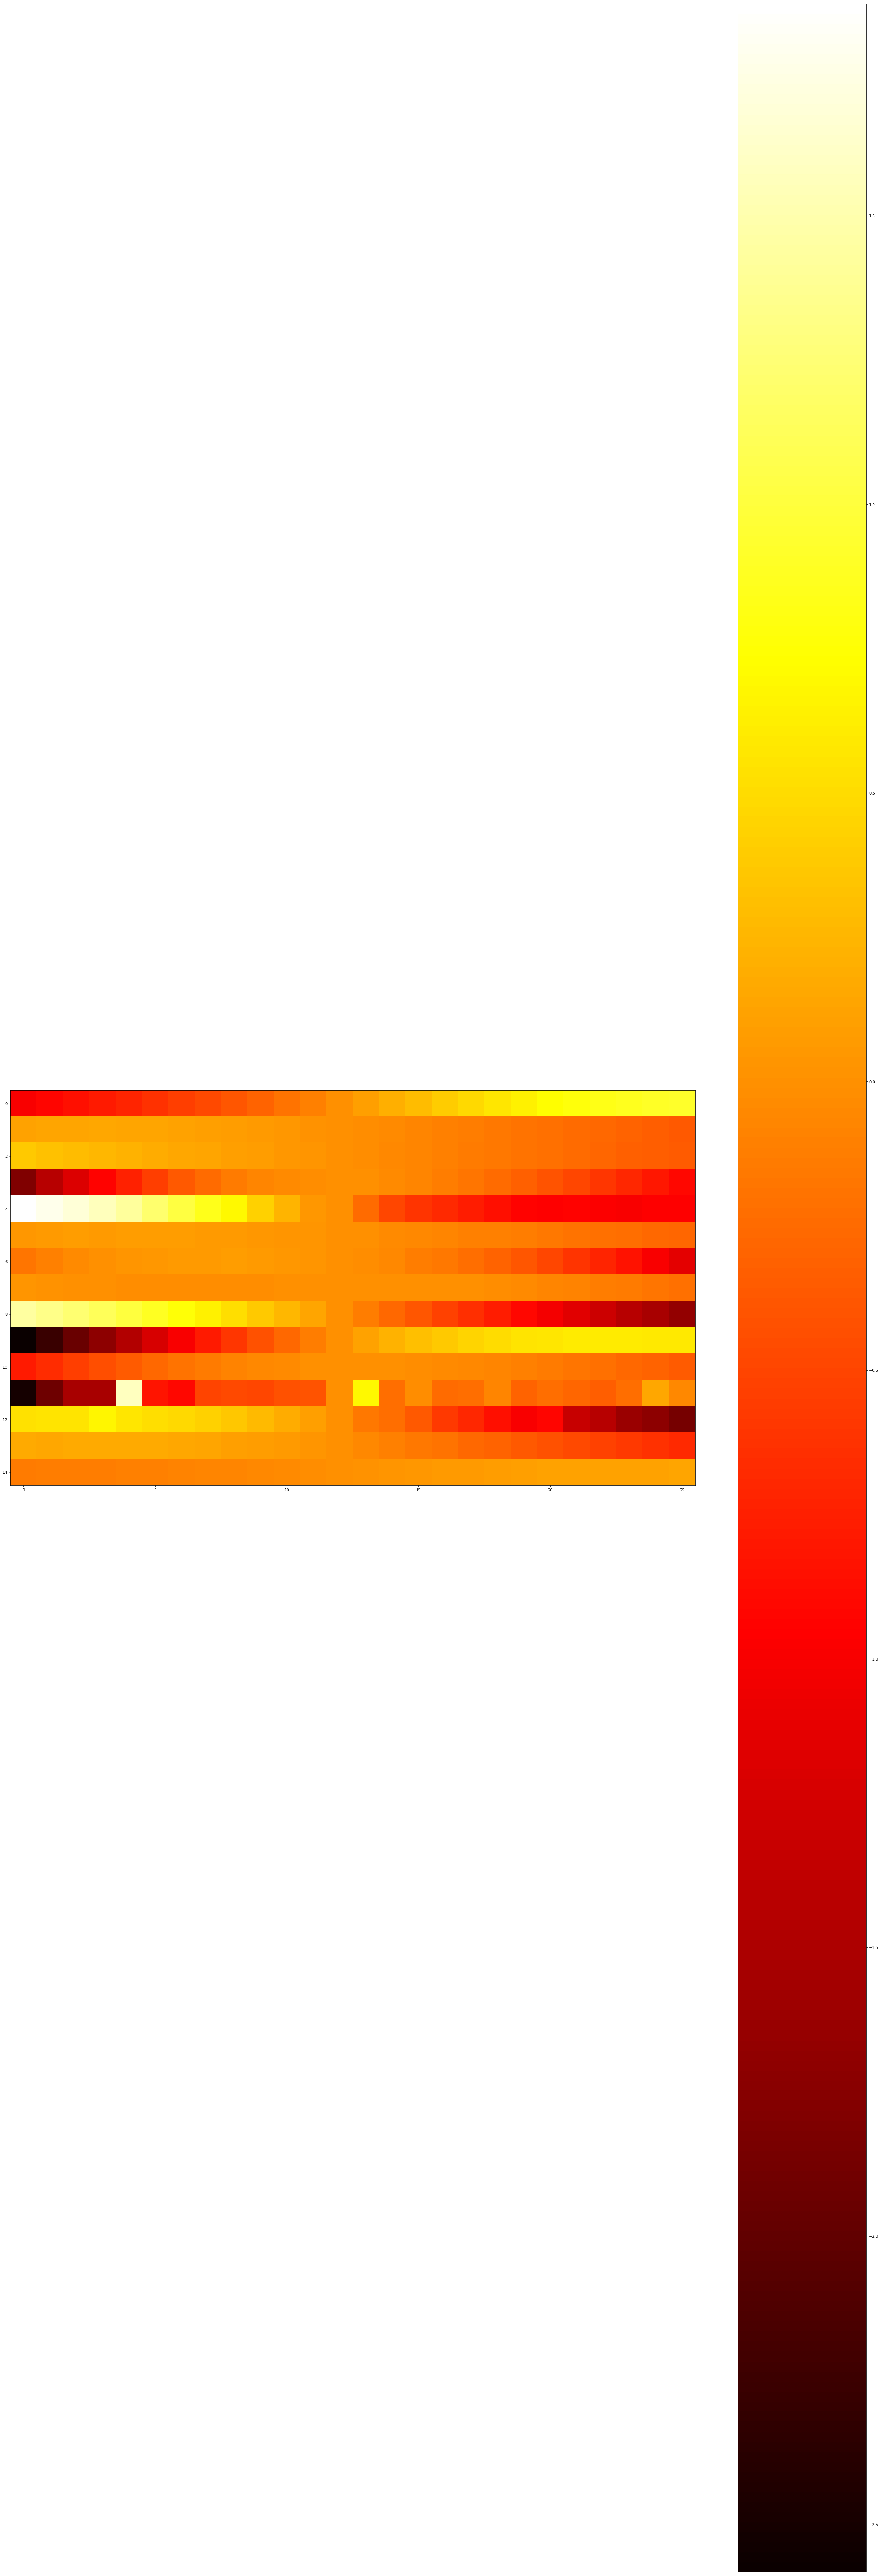

In [15]:
plt.figure(figsize=(40, 170))
plt.imshow(momemta_log_ratios, cmap='hot', interpolation='nearest')
plt.colorbar()